In [72]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,20

# dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
#          'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
#          'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
#          'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
#          'DepDelay': np.float16, 'CarrierDelay': np.float16, 
#          'WeatherDelay': np.float16, 'NASDelay': np.float16, 
#          'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
#          'DepTime': np.float16}

In [2]:
path = '2008.csv.bz2'
data = pd.read_csv(path)

In [3]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
Month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DayofMonth,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
DayOfWeek,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
DepTime,2003,754,628,926,1829,1940,1937,1039,617,1620,706,1644,1426,715,1702,1029,1452,754,1323,1416
CRSDepTime,1955,735,620,930,1755,1915,1830,1040,615,1620,700,1510,1430,715,1700,1020,1425,745,1255,1325
ArrTime,2211,1002,804,1054,1959,2121,2037,1132,652,1639,916,1845,1426,720,1651,1021,1640,940,1526,1512
CRSArrTime,2225,1000,750,1100,1925,2110,1940,1150,650,1655,915,1725,1425,710,1655,1010,1625,955,1510,1435
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920,378,509,535,11,810,100,1333,829,1016,1827,2272,675,1144,4,54


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB




1. How many unique carriers are there in our dataset?

    10
    
    15
    
    **20**
    
    25
    



In [5]:
data['UniqueCarrier'].nunique()

20

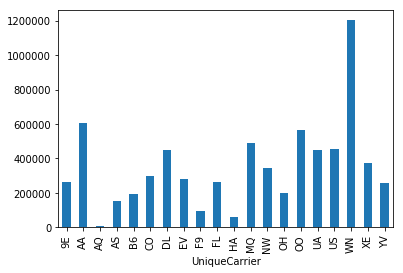

In [6]:
data.groupby('UniqueCarrier').size().plot(kind='bar');

In [7]:

a = data.loc[data['Cancelled'] == 0, 'FlightNum'].sum()
b =  data.loc[data['Cancelled'] == 1, 'FlightNum'].sum()

print(a-b)
print(a)
print(b)

14819278119
15205157937
385879818




2. We have both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?

Hint: Take a look at Cancelled to see the categories and FlightNum column to calculate unique flights for each category.

    Cancelled overweights completed by 329 flights
    Completed overweights cancelled by 6734860 flights
    Cancelled overweights completed by 671 flights
    Completed overweights cancelled by 11088967 flights



In [8]:
data['Cancelled'].value_counts()

0    6872294
1     137434
Name: Cancelled, dtype: int64



3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?

    yes, ATL
    
    yes, HNL
    
    **yes, MSP**
    
    no



In [9]:
data[data["DepDelay"]==data['DepDelay'].max()]["Dest"]

2235378    MSP
Name: Dest, dtype: object

In [10]:
data[data["ArrDelay"]==data['ArrDelay'].max()]["Dest"]

1018798    MSP
Name: Dest, dtype: object



4. Find the carrier that has the greatest number of cancelled flights.

    AA
    
   **MQ**
    
    WN
    
    CO



In [11]:
 data.groupby(['UniqueCarrier'])[["Cancelled"]].sum().sort_values("Cancelled")

,Cancelled
UniqueCarrier,
AQ,42
F9,303
HA,570
AS,2139
FL,2236
NW,2906
B6,3205
CO,3702
EV,5026




5. Let's examine departure time and consider distribution by hour (column DepHour that we've created earlier). Which hour has the highest percentage of flights?

    1 am
    
    5 am
    
    **8 am**
    
    
    3 pm



In [12]:
data['DepHour'] = data['DepTime'] // 100
data['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [13]:
data["DepHour"].value_counts()

8.0     449224
6.0     446737
11.0    444702
7.0     436700
13.0    435917
9.0     434850
16.0    434017
17.0    432488
10.0    431460
12.0    424249
14.0    416875
15.0    411126
18.0    400784
19.0    387288
20.0    285991
21.0    254850
5.0     148167
22.0    119651
23.0     46103
0.0      20368
1.0       5861
4.0       3390
2.0       1851
3.0        833
Name: DepHour, dtype: int64



6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?

    2 am
    
    9 pm
    
    8 am
    
    **3 am**



In [14]:
 data.groupby(['DepHour'])[["Cancelled"]].sum().sort_values("Cancelled")

,Cancelled
DepHour,
3.0,0
2.0,1
4.0,1
1.0,4
0.0,7
23.0,24
5.0,24
13.0,47
20.0,51




7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.

    **3**
    
    19
    
    22
    
    4

Look to previous question.



8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.

Hint: Consider only completed flights.

    4
    
    7
    
    8
    
   **17**
    



In [15]:
 data[data["Cancelled"]==0].groupby(['DepHour'])["FlightNum"].max().sort_values()

DepHour
3.0     7341
4.0     7450
2.0     7784
1.0     7812
18.0    7825
0.0     7826
21.0    7826
22.0    7826
23.0    7826
7.0     7827
5.0     9202
13.0    9740
16.0    9740
6.0     9740
20.0    9740
8.0     9740
9.0     9741
10.0    9741
15.0    9741
17.0    9741
19.0    9741
11.0    9741
12.0    9742
14.0    9743
Name: FlightNum, dtype: int64



9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?

Hint: Consider only completed flights.

    no, there are no such cases
    
   **yes, at 5-6 am**
   
    yes, at 9-10 am
    
    yes, at 2-4 pm



In [16]:
 data[data["Cancelled"]==0].groupby(['DepHour'])["DepDelay"].sum()

DepHour
0.0     1440238.0
1.0      654718.0
2.0      226794.0
3.0       79818.0
4.0       11437.0
5.0     -630435.0
6.0     -727783.0
7.0       44762.0
8.0      790770.0
9.0     1631894.0
10.0    2356469.0
11.0    2971071.0
12.0    3352341.0
13.0    3840801.0
14.0    4314740.0
15.0    4882679.0
16.0    5156894.0
17.0    5713093.0
18.0    6147071.0
19.0    6535264.0
20.0    6515140.0
21.0    5867514.0
22.0    4549183.0
23.0    2765295.0
Name: DepDelay, dtype: float64



10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?

    at noon
    
    at 7 am
    
    at 8 am
    
    **at 10 am**



In [17]:
data[data["Cancelled"]==0].groupby(['DepHour'])["FlightNum"].sum().sort_values()

DepHour
3.0         727897
2.0        1430302
4.0        6702087
1.0        6772202
0.0       24577944
23.0      63627561
22.0     225545668
5.0      401834188
21.0     560561907
20.0     611391135
18.0     857528874
19.0     869157859
7.0      888587424
15.0     927593850
8.0      942153217
14.0     948488478
12.0     960861261
17.0     960939284
9.0      969204416
10.0     979090727
6.0      984495787
13.0     996813431
11.0    1003320206
16.0    1013752232
Name: FlightNum, dtype: int64



11. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?

Which of the listed below is not in your top-10 list?

    DL
    
    AA
    
    **OO**
    
    EV



In [18]:
data[data["Cancelled"]==0].groupby(['UniqueCarrier'])["FlightNum"].sum().sort_values(ascending=False)

UniqueCarrier
OO    2919587030
WN    1886434028
MQ    1861679201
EV    1301220082
YV    1151166710
9E    1116421124
OH    1089161703
XE     953973777
AA     730501400
DL     504041923
US     466250028
UA     314366712
NW     290832526
CO     276871738
FL     127299457
B6     103065762
AS      50258543
F9      46447508
HA      13913566
AQ       1665119
Name: FlightNum, dtype: int64



12. Plot distributions of flight cancellation reasons (CancellationCode).

What is the most frequent reason for flight cancellation? (Use this link to translate codes into reasons)

    Carrier
    
   **Weather conditions**
    
    National Air System
    
    Security reasons



In [19]:
# data[data["Cancelled"]==0].groupby(['CarrierDelay', 'WeatherDelay','NASDelay','SecurityDelay']).sum()
data['CancellationCode'].value_counts()


B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64



13. Which route is the most frequent, in terms of the number of flights?

(Take a look at 'Origin' and 'Dest' features. Consider A->B and B->A directions as different routes)

    New-York – Washington (JFK-IAD)
    **San-Francisco – Los-Angeles (SFO-LAX)**
    San-Jose – Dallas (SJC-DFW)
    New-York – San-Francisco (JFK-SFO)



In [20]:
data[(data['Origin'] == 'JFK') & (data['Dest'] == 'IAD')].shape

(2299, 30)

In [21]:
data[(data['Origin'] == 'SFO') & (data['Dest'] == 'LAX')].shape

(13788, 30)

In [22]:
data[(data['Origin'] == 'SJC') & (data['Dest'] == 'DFW')].shape

(2264, 30)

In [23]:
data[(data['Origin'] == 'JFK') & (data['Dest'] == 'SFO')].shape

(6591, 30)



14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.

Hint: consider only positive delays

    449
    
    539
    
    549
    
   **668**



In [24]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepHour'],
      dtype='object')

In [25]:
depdelay = (data[data['DepDelay'] > 0].groupby(['Origin','Dest'])['DepDelay'].count())
depdelay.sort_values(ascending=False)

Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5311
HOU     DAL     5288
ATL     LGA     5241
LAS     LAX     4901
PHX     LAS     4792
LAX     LAS     4661
PHX     LAX     4534
ATL     MCO     4505
LGA     ATL     4438
DEN     LAX     4306
ATL     DFW     4303
DFW     ORD     4146
LGA     ORD     4042
LAS     PHX     4006
ORD     LAX     3988
DEN     LAS     3977
LAX     PHX     3965
ATL     EWR     3926
ORD     DFW     3900
DFW     ATL     3892
LAX     DEN     3882
ORD     EWR     3848
PHX     SAN     3814
DEN     SLC     3783
        PHX     3773
ORD     MSP     3745
OAK     LAX     3745
                ... 
ICT     SLC        1
        SGF        1
        PIA        1
CLE     TUL        1
ICT     MSY        1
CLT     ATW        1
ICT     MCI        1
        CID        1
MKE     MCI        1
MCI     MKE        1
        MGM        1
CLT     GRR        1
SBP     MRY        1
        FAT        1
TUL     ASE        1
TPA     MCO        1


LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5311
HOU     DAL     5288

In [26]:
data_ORD_LGA = data[((data['Origin']=='LAX') &  (data['Dest']=='SFO'))]
data_ORD_LGA[data_ORD_LGA['WeatherDelay']>0].shape

(109, 30)

In [27]:
data_ORD_EWR = data[((data['Origin']=='DAL') &  (data['Dest']=='HOU'))]
data_ORD_EWR[data_ORD_EWR['WeatherDelay']>0].shape

(133, 30)

In [28]:
data_LAX_SFO = data[((data['Origin']=='SFO') &  (data['Dest']=='LAX')) ]
data_LAX_SFO[data_LAX_SFO['WeatherDelay']>0].shape

(31, 30)

In [29]:
data_LGA_ORD = data[((data['Origin']=='ORD') &  (data['Dest']=='LGA'))]
data_LGA_ORD[data_LGA_ORD['WeatherDelay']>0].shape

(266, 30)

In [30]:
data_SFO_LAX= data[((data['Origin']=='HOU') &  (data['Dest']=='DAL'))]
data_SFO_LAX[data_SFO_LAX['WeatherDelay']>0].shape

(129, 30)

In [31]:
109+133+31+266+129


668



15. Examine the hourly distribution of departure times. Choose all correct statements:

    Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
    
    Flights are uniformly distributed within time interval [0-23].
    
    **In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.**



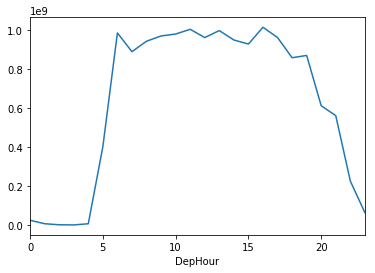

In [43]:
data.groupby(['DepHour'])['FlightNum'].sum().plot();




16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.

Choose all correct statements:

   **The number of flights during weekends is less than during weekdays (working days).**
    
    The lowest number of flights is on Sunday.
    
   **There are less flights during winter than during summer.**
    

Hint: Look for official meteorological winter months for the Nothern Hemisphsere.


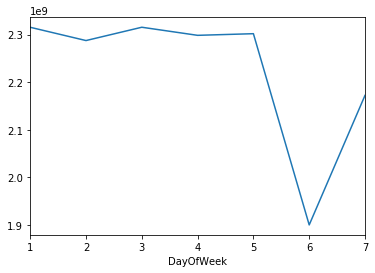

In [48]:
#The number of flights during weekends is less than during weekdays (working days). ITS FALSE

# data_weekends = data[data['']]

data.groupby('DayOfWeek')['FlightNum'].sum().plot()


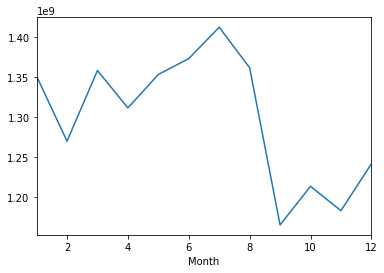

In [51]:
data.groupby('Month')['FlightNum'].sum().plot()



17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.

Choose all correct statements:

    October has the lowest number of cancellations due to weather.
    
    The highest number of cancellations in September is due to Security reasons.
    
    April's top cancellation reason is carriers.
    
    Flights cancellations due to National Air System are more frequent than those due to carriers.



In [ ]:

g = sns.pairplot(data)

/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


MemoryError: 